Develop a Colab tutorial to illustrate the following concepts in 1A and 1B below (Use this Example notebook to help you get started):

1A. Probability distributions – Bernoulli, Uniform, Poisson, Gaussian, and Log_Normal. Create a Colab as follows: Use random number generator to generate samples that follow the five distributions. Then plot the histogram of the generated samples and plot their probability density function on top of it.  Write down the equations defining each of the distributions, explaining all terms - either add as markdown or as an image. Do this sequentially, one after the other, in one Colab notebook.

1B. Noise in signals – Similar to the exercise above, develop a Colab to illustrate the following: Generation of white noise, Brownian noise (a.k.a. random walk noise), and pink noise. As in 1A, provide the equations, characteristics, etc. as relevant, using markdown or as an image.

# 1A / 1B


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.signal as signal
%matplotlib inline

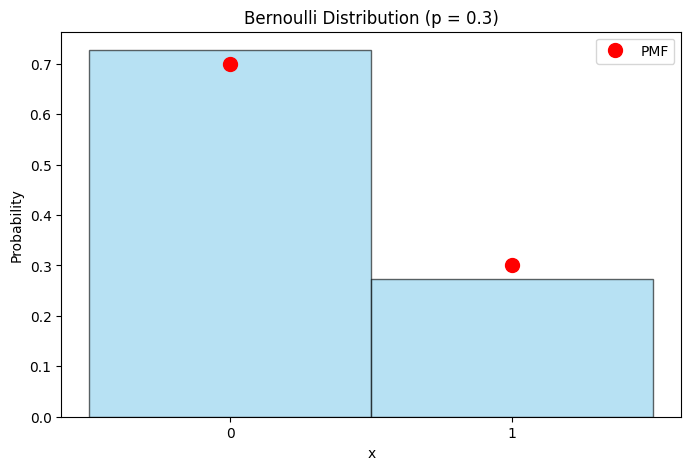

In [3]:
# Bernoulli Distribution
p = 0.3  # probability of success
dist_bernoulli = st.bernoulli
samples = dist_bernoulli.rvs(p, size=1000)

# Possible values and their theoretical PMF
x_values = np.array([0, 1])
pmf_values = dist_bernoulli.pmf(x_values, p)

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=2, range=(-0.5, 1.5), density=True,
         alpha=0.6, color='skyblue', edgecolor='black')
plt.plot(x_values, pmf_values, 'ro', markersize=10, label='PMF')
plt.xticks(x_values)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution (p = 0.3)')
plt.legend()
plt.show()

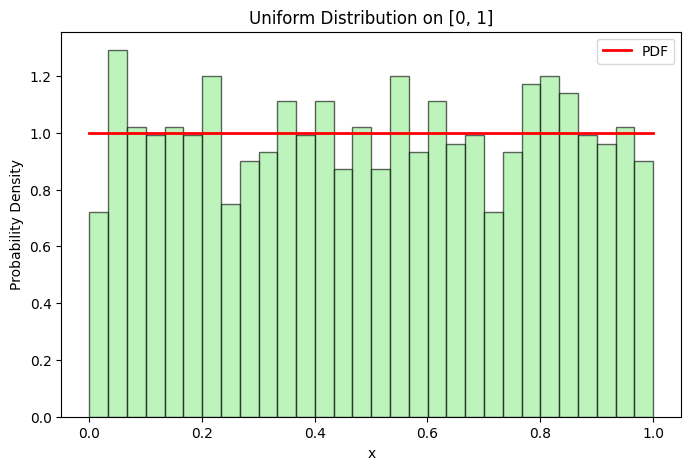

In [4]:
# Uniform Distribution
a, b = 0, 1
dist_uniform = st.uniform
samples_uniform = dist_uniform.rvs(loc=a, scale=b-a, size=1000)

plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(samples_uniform, bins=30, density=True,
                            alpha=0.6, color='lightgreen', edgecolor='black')
pdf_uniform = dist_uniform.pdf(bins, loc=a, scale=b-a)
plt.plot(bins, pdf_uniform, 'r-', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution on [{}, {}]'.format(a, b))
plt.legend()
plt.show()

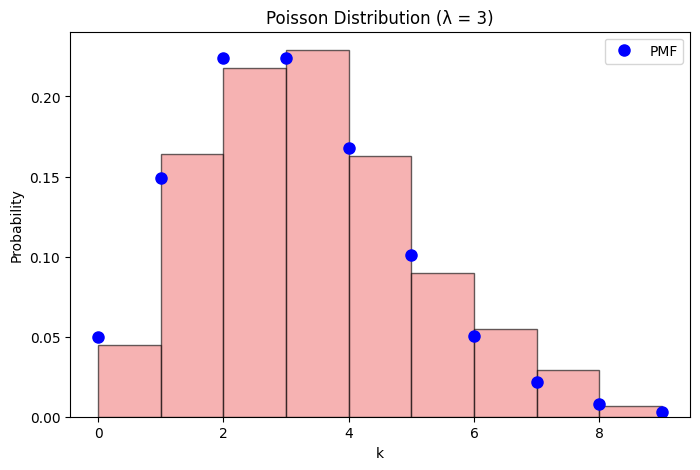

In [5]:
# Poisson Distribution
lambda_val = 3  # expected number of events
dist_poisson = st.poisson
samples_poisson = dist_poisson.rvs(mu=lambda_val, size=1000)

# Determine range for k values
k_values = np.arange(0, np.max(samples_poisson) + 1)
pmf_poisson = dist_poisson.pmf(k_values, mu=lambda_val)

plt.figure(figsize=(8, 5))
plt.hist(samples_poisson, bins=len(k_values)-1, density=True,
         alpha=0.6, color='lightcoral', edgecolor='black')
plt.plot(k_values, pmf_poisson, 'bo', markersize=8, label='PMF')
plt.xlabel('k')
plt.ylabel('Probability')
plt.title('Poisson Distribution (λ = {})'.format(lambda_val))
plt.legend()
plt.show()

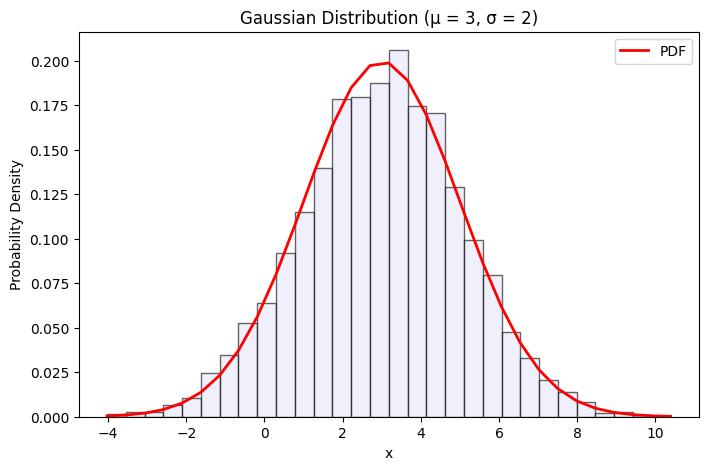

In [6]:
# Gaussian Distribution
mu, sigma = 3, 2
dist_norm = st.norm
samples_norm = dist_norm.rvs(loc=mu, scale=sigma, size=5000)

plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(samples_norm, bins=30, density=True,
                            alpha=0.6, color='lavender', edgecolor='black')
pdf_norm = dist_norm.pdf(bins, loc=mu, scale=sigma)
plt.plot(bins, pdf_norm, 'r-', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution (μ = {}, σ = {})'.format(mu, sigma))
plt.legend()
plt.show()

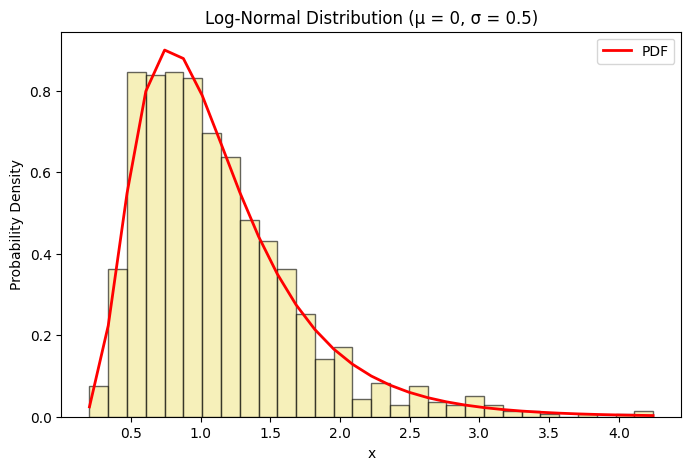

In [7]:
# Log-Normal Distribution
mu_ln, sigma_ln = 0, 0.5  # parameters for the underlying normal distribution
dist_lognorm = st.lognorm
samples_lognorm = dist_lognorm.rvs(s=sigma_ln, scale=np.exp(mu_ln), size=1000)

plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(samples_lognorm, bins=30, density=True,
                            alpha=0.6, color='khaki', edgecolor='black')
pdf_lognorm = dist_lognorm.pdf(bins, s=sigma_ln, scale=np.exp(mu_ln))
plt.plot(bins, pdf_lognorm, 'r-', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Log-Normal Distribution (μ = {}, σ = {})'.format(mu_ln, sigma_ln))
plt.legend()
plt.show()

In [10]:
# Time series parameters
fs = 1000   # Sampling frequency in Hz
N = 10000   # Number of samples (10 seconds)
t = np.arange(N) / fs * 1000  # time vector in milliseconds

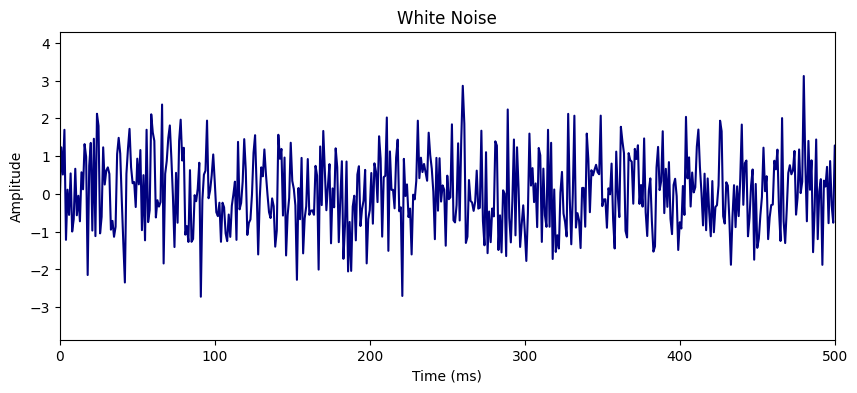

In [11]:
# White Noise
white_noise = np.random.randn(N)  # standard Gaussian noise

plt.figure(figsize=(10, 4))
plt.plot(t, white_noise, color='navy')
plt.xlim([0, 500])  # display first 500 ms for clarity
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('White Noise')
plt.show()

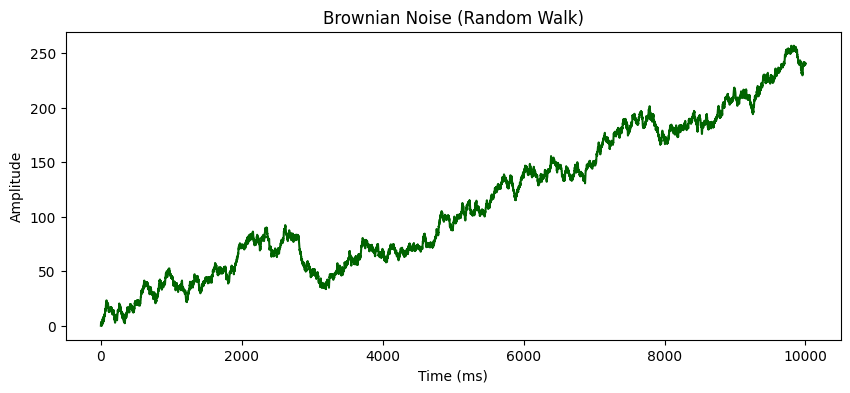

In [12]:
# Brownian Noise (Random Walk)
brownian_noise = np.cumsum(white_noise)

plt.figure(figsize=(10, 4))
plt.plot(t, brownian_noise, color='darkgreen')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Brownian Noise (Random Walk)')
plt.show()

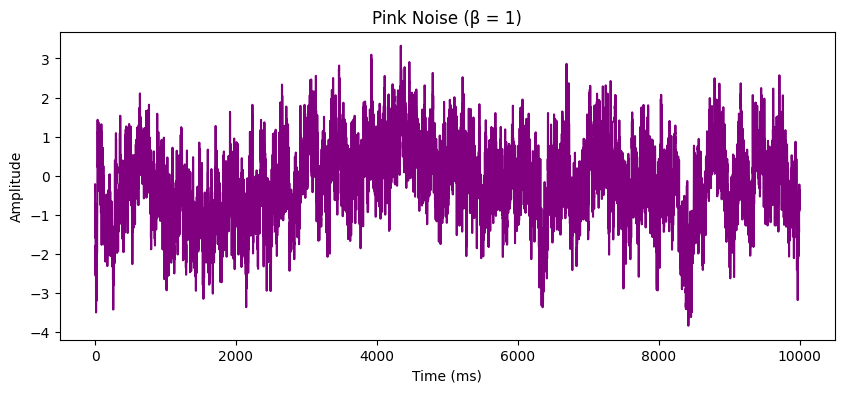

In [13]:
!pip install colorednoise

import colorednoise as cn

beta = 1  # exponent for 1/f^beta (pink noise)
pink_noise = cn.powerlaw_psd_gaussian(beta, N)

plt.figure(figsize=(10, 4))
plt.plot(t, pink_noise, color='purple')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Pink Noise (β = {})'.format(beta))
plt.show()

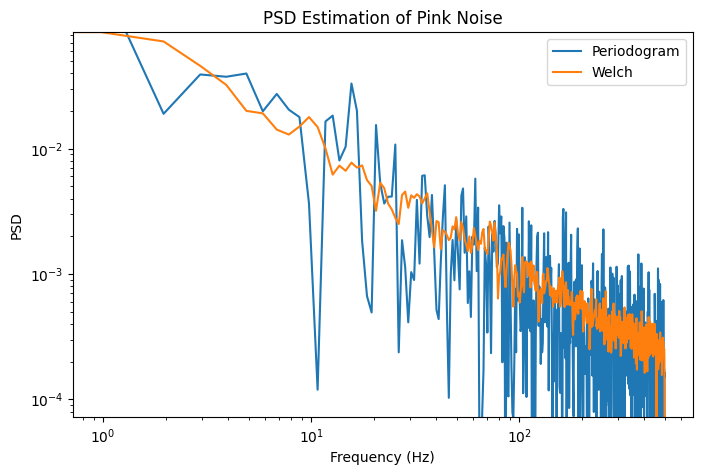

In [14]:
# PSD estimation for pink noise
nperseg = 1024  # segment length for PSD estimation

# Using the periodogram method
f1, pxx1 = signal.periodogram(pink_noise, fs=fs, nfft=nperseg)

# Using Welch's method
f2, pxx2 = signal.welch(pink_noise, fs=fs, nperseg=nperseg)

plt.figure(figsize=(8, 5))
plt.plot(f1, pxx1, label='Periodogram')
plt.plot(f2, pxx2, label='Welch')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('PSD Estimation of Pink Noise')
plt.xscale('log')
plt.yscale('log')
plt.ylim([pxx2.min(), pxx2.max()])
plt.legend()
plt.show()

# 1B

# 2B

- Use MAE when you want a loss function that is less sensitive to outliers. MAE calculates the absolute differences between predictions and targets, so each error is treated equally. This makes MAE more robust when your data has noise or extreme values. On the other hand, MSE squares the differences, which means large errors have a much bigger impact on the loss. If you want to avoid having a few large errors dominate the loss, MAE is the better choice. Additionally, MAE gives an average error directly in the same units as your target variable, which can be easier to understand.

- NLLLoss expects its input to be log-probabilities, meaning you must apply a log-softmax to your model’s outputs first. The targets are given as class indices. In contrast, CrossEntropyLoss takes raw scores as input and automatically applies softmax and log operations inside the function. This makes CrossEntropyLoss more straightforward to use when your model outputs unnormalized scores. In short, use NLLLoss if you have log probabilities, and choose CrossEntropyLoss when you want the loss function to handle the softmax conversion for you.